In [1]:
from backward_process.generating import Generate
from save_plot.plotter import PlotCritical
from initial_distributions.two_deltas import GenerateTwoDeltas
from initial_distributions.two_inequal_deltas import GenerateTwoInequalDeltas
from neural_network.training_nn import TrainModel
from neural_network.neural_network import FeedForward

import matplotlib.pyplot as plt
import torch 

device = torch.device(f'cuda:{torch.cuda.current_device()}') if torch.cuda.is_available() else 'cpu'

In [25]:
ndata = 1000
timesteps = 1000
plt.style.use('bmh')


In [ ]:
loss_hist_train, val_hist_train, scaler, test_loss = TrainModel(timesteps, ndata, initial_distribution=GenerateTwoDeltas)

Generating two deltas distribution with 1000 data points...
Beginning training...
test error:  0.12623006105422974


In [27]:
model = FeedForward(input_size=2,output_size=1,n_hidden_layers=2,depht=200).to(device)
state_dict = torch.load('model.pth',weights_only=False)
model.load_state_dict(state_dict)
model.eval();

In [28]:
Generate(timesteps, ndata, model=model, scaler=scaler)

Backward process started...


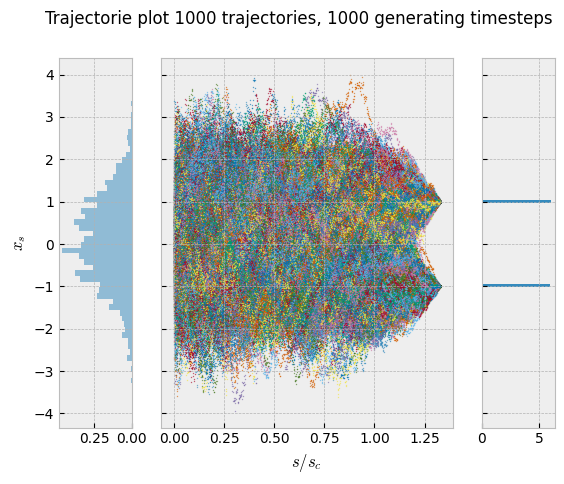

In [39]:
import numpy as np
import pandas as pd


name = str(ndata)+" trajectories, "+str(timesteps)+" generating timesteps"

critical_time = timesteps - 246

reduced_timesteps = np.arange(timesteps)/critical_time

fig, ax = plt.subplots(ncols=3, width_ratios=[1, 4, 1], sharey=True)
ax[0].set_ylabel(r"$x_{s}$")
ax[1].set_xlabel(r"$s/s_c$")
fig.suptitle("Trajectorie plot "+name)

#scatter plot

distros = pd.read_csv("data/generated_data.csv", header=None).to_numpy()

for i in range(distros.shape[1]):

    ax[1].scatter(reduced_timesteps, distros[:,i], alpha = 0.5, s=0.3)

#histograms

hist0 = distros[0,:]
hist2= distros[-1,:]

ax[0].hist(hist0, bins=50, orientation='horizontal', density=True, alpha=0.5)
ax[2].hist(hist2, bins=25, orientation='horizontal', density=True)

ax[0].invert_xaxis()

In [33]:
def GetCorrelations(array):

    corr = (array**2).mean(axis=1) - (array.mean(axis=1))**2

    return corr

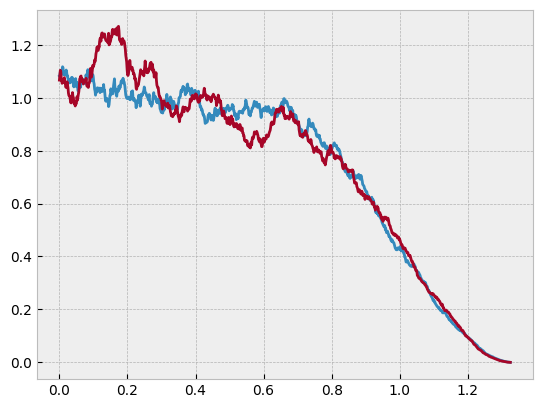

In [34]:
distros_c1 = distros[:, distros[-1,:] >= 0]
distros_c2 = distros[:, distros[-1,:] < 0]

fig_corr, ax_corr = plt.subplots()
correlations1 = GetCorrelations(distros_c1)
correlations2 = GetCorrelations(distros_c2)

ax_corr.plot(reduced_timesteps, correlations1)
ax_corr.plot(reduced_timesteps, correlations2)

In [37]:
distros_c1.mean(axis=1).shape

(1000,)

In [ ]:
def CriticalvsNdata():
    
    ndata_list = [10, 100, 1000, 10000, 100000]

    for ndata in ndata_list:
        
        loss_hist_train, val_hist_train, scaler, test_loss = TrainModel(timesteps, ndata, initial_distribution=GenerateTwoDeltas)
        
        model = FeedForward(input_size=2,output_size=1,n_hidden_layers=2,depht=200).to(device)
        state_dict = torch.load('model.pth',weights_only=False)
        model.load_state_dict(state_dict)
        model.eval();

        Generate(timesteps, ndata, model=model, scaler=scaler)


    